Prepare a model for glass classification using KNN

In [1]:
#load the data set
from pandas import read_csv
import numpy as np
data=read_csv("E:\\Data Science\\glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### perform EDA

In [2]:
data.shape

(214, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
!Pip install sweetviz
import sweetviz as sv
#sweet_report=sv.analyze(data)
#sweet_report.show_html('data.html')

In [7]:
#check null values
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
#check duplicate records
dup=data.duplicated()
print(dup.sum())
data[dup]

1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
data1=data.drop_duplicates()

In [10]:
data1.shape

(213, 10)

In [11]:
data1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [12]:
# check correlation using predictive power score(pps)
import ppscore as pps
pps.predictors(data1,"Type")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Ba,Type,0.319823,regression,True,mean absolute error,1.43662,0.977156,DecisionTreeRegressor()
1,Mg,Type,0.261031,regression,True,mean absolute error,1.43662,1.061618,DecisionTreeRegressor()
2,K,Type,0.187555,regression,True,mean absolute error,1.43662,1.167174,DecisionTreeRegressor()
3,Al,Type,0.118820,regression,True,mean absolute error,1.43662,1.265921,DecisionTreeRegressor()
4,Na,Type,0.085698,regression,True,mean absolute error,1.43662,1.313505,DecisionTreeRegressor()
5,RI,Type,0.000000,regression,True,mean absolute error,1.43662,1.634783,DecisionTreeRegressor()
6,Si,Type,0.000000,regression,True,mean absolute error,1.43662,1.905122,DecisionTreeRegressor()
7,Ca,Type,0.000000,regression,True,mean absolute error,1.43662,1.700603,DecisionTreeRegressor()
8,Fe,Type,0.000000,regression,True,mean absolute error,1.43662,1.727945,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

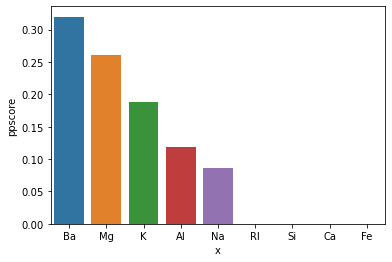

In [13]:
# visualization of the result
import seaborn as sns
predictors_df=pps.predictors(data1,y="Type")
sns.barplot(data=predictors_df,x="x",y="ppscore")

In [14]:
X=data1[['Ba','Mg','K','Al','Na']]
#x=data1.iloc[:,0:9]
Y=data1.iloc[:,-1]

In [15]:
from sklearn.preprocessing import scale
X_norm=scale(X)

In [16]:
# Build a model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
kfold=KFold(n_splits=131)
model=KNeighborsClassifier(n_neighbors=8)
results=cross_val_score(model,X,Y,cv=kfold)
results.mean()

0.683206106870229

### grid search for algorithm tuning

In [18]:
from sklearn.model_selection import GridSearchCV
k_values=np.array(range(1,40,2))
param_grid=dict(n_neighbors=k_values)
knn=GridSearchCV(estimator=model, param_grid=param_grid)
knn.fit(X_norm,Y.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=8),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [19]:
print(knn.best_score_)
print(knn.best_params_)

0.6627906976744186
{'n_neighbors': 7}


In [20]:
#visualize the CV result
import matplotlib.pyplot as plt
%matplotlib inline
k_range=range(1,40)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_norm,Y,cv=5)
    k_score.append(score.mean())

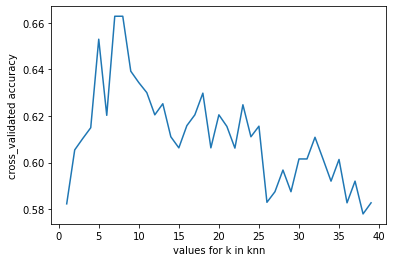

In [21]:
plt.plot(k_range,k_score)
plt.xlabel("values for k in knn")
plt.ylabel("cross_validated accuracy")
plt.show()